# Algoritmo Guloso

IGA - Pedidos: 20, Máquinas: 5
Melhor Custo (IGA): 951, Tempo: 10.02 segundos

IGA - Pedidos: 50, Máquinas: 10
Melhor Custo (IGA): 2481, Tempo: 10.36 segundos

IGA - Pedidos: 10, Máquinas: 2
Melhor Custo (IGA): 425, Tempo: 10.00 segundos



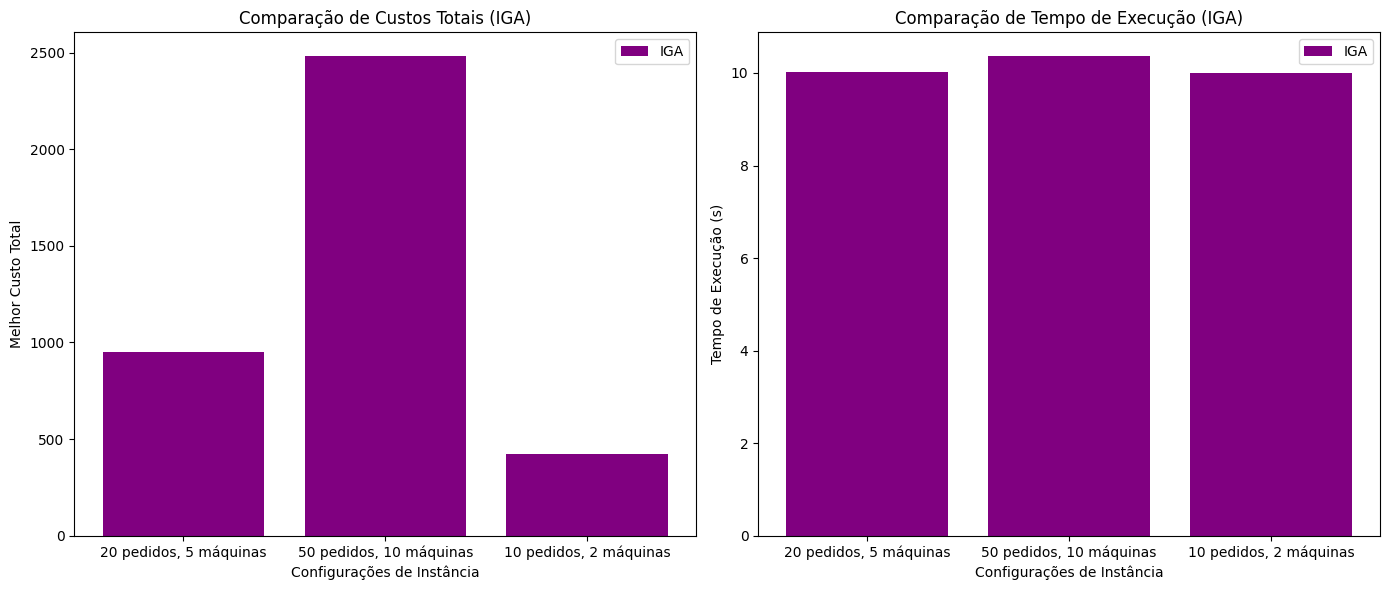

In [17]:
import random
import time
import math
import matplotlib.pyplot as plt

# Classe IGA com Construção NEH e Construção Gulosa
class IGA:
    def __init__(self, dmin, dmax, y, z, orders, num_machines):
        self.dmin = dmin
        self.dmax = dmax
        self.y = y
        self.z = z
        self.orders = orders
        self.num_machines = num_machines
        self.best_schedule = None
        self.best_cost = float('inf')

    def initialize(self):
        """Criação de um agendamento inicial usando o método NEH."""
        total_production_times = [sum(order) for order in self.orders]
        sorted_orders = sorted(enumerate(total_production_times), key=lambda x: x[1], reverse=True)
        schedule = []

        for order_index, _ in sorted_orders:
            best_position = 0
            best_cost = float('inf')
            for position in range(len(schedule) + 1):
                temp_schedule = schedule[:position] + [order_index] + schedule[position:]
                cost = self.calculate_cost(temp_schedule)
                if cost < best_cost:
                    best_cost = cost
                    best_position = position

            schedule.insert(best_position, order_index)

        return schedule

    def calculate_cost(self, schedule):
        """Calcula o custo total de um determinado agendamento."""
        machine_times = [0] * self.num_machines
        for order_index in schedule:
            min_machine = min(range(self.num_machines), key=lambda i: machine_times[i])
            machine_times[min_machine] += sum(self.orders[order_index])
        return max(machine_times)

    def local_search(self, schedule):
        """Realiza uma busca local para otimizar o agendamento."""
        for _ in range(int(self.z * len(schedule))):
            order_to_move = random.choice(schedule)
            schedule.remove(order_to_move)
            best_position = 0
            best_cost = float('inf')
            for position in range(len(schedule) + 1):
                temp_schedule = schedule[:position] + [order_to_move] + schedule[position:]
                cost = self.calculate_cost(temp_schedule)
                if cost < best_cost:
                    best_cost = cost
                    best_position = position
            schedule.insert(best_position, order_to_move)

        return schedule

    def accept(self, current_schedule, new_schedule):
        """Critério de aceitação para determinar se o novo agendamento é aceito."""
        new_cost = self.calculate_cost(new_schedule)
        current_cost = self.calculate_cost(current_schedule)
        if new_cost < current_cost:
            return new_schedule
        else:
            q = random.uniform(0, 1)
            if q <= math.exp(-self.y * (self.dmin / self.dmax) * (new_cost - current_cost) / current_cost):
                return new_schedule
        return current_schedule

    def run(self, time_limit):
        """Executa o algoritmo IGA dentro do limite de tempo especificado."""
        current_schedule = self.initialize()
        start_time = time.time()
        
        while time.time() - start_time < time_limit:
            current_schedule = self.local_search(current_schedule)
            new_schedule = current_schedule[:]
            current_schedule = self.accept(current_schedule, new_schedule)

        self.best_schedule = current_schedule
        self.best_cost = self.calculate_cost(current_schedule)


def generate_instances(num_orders, num_machines):
    """Gera instâncias aleatórias de pedidos e máquinas."""
    return [[random.randint(1, 100) for _ in range(num_machines)] for _ in range(num_orders)]


# Configuração experimental para os IGAs
time_limit = 10
y = 1000
z = 2.0
test_instances = [(20, 5), (50, 10), (10, 2)]

# Execução dos testes e coleta de dados
results = {"instance": [], "IGA_cost": [], "IGA_time": []}

for num_orders, num_machines in test_instances:
    orders = generate_instances(num_orders, num_machines)

    # Usando IGA
    iga = IGA(dmin=max(1, num_orders // 2), dmax=1, y=y, z=z, orders=orders, num_machines=num_machines)
    start_time = time.time()
    iga.run(time_limit)
    iga_time = time.time() - start_time

    print(f"IGA - Pedidos: {num_orders}, Máquinas: {num_machines}")
    print(f"Melhor Custo (IGA): {iga.best_cost}, Tempo: {iga_time:.2f} segundos\n")

    # Salvando resultados
    results["instance"].append(f"{num_orders} pedidos, {num_machines} máquinas")
    results["IGA_cost"].append(iga.best_cost)
    results["IGA_time"].append(iga_time)

# Gráficos comparativos de custos e tempos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de custos
ax[0].bar(results["instance"], results["IGA_cost"], color='purple', label="IGA")
ax[0].set_title("Comparação de Custos Totais (IGA)")
ax[0].set_xlabel("Configurações de Instância")
ax[0].set_ylabel("Melhor Custo Total")
ax[0].legend()

# Gráfico de tempo
ax[1].bar(results["instance"], results["IGA_time"], color='purple', label="IGA")
ax[1].set_title("Comparação de Tempo de Execução (IGA)")
ax[1].set_xlabel("Configurações de Instância")
ax[1].set_ylabel("Tempo de Execução (s)")
ax[1].legend()

plt.tight_layout()
plt.show()


# Teste do Problema com o GUROBI

Set parameter TimeLimit to value 10
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Academic license 2580239 - for non-commercial use only - registered to jo___@mail.uft.edu.br
Optimize a model with 200 rows, 220 columns and 400 nonzeros
Model fingerprint: 0x98bb1c4e


Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 200 rows and 220 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.5900000e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.590000000e+02

Gurobi - Pedidos: 20, Máquinas: 5
Melhor Custo (Gurobi): 559.0, Tempo: 0.04 segundos
Set parameter TimeLimit to value 10
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Academic license 2580239 - for non-commercial use only - registered to jo___@mail.uft.edu.br
Optimize a model with 1000 rows, 1050 columns and 200

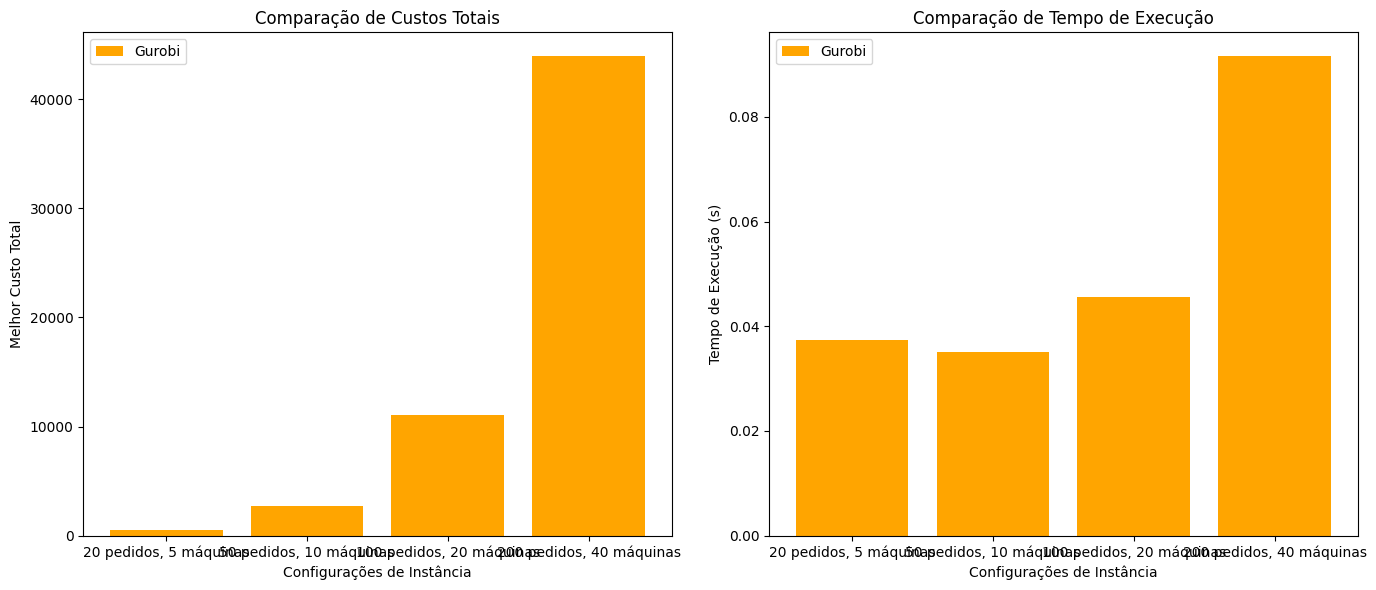

In [ ]:
import random
import matplotlib.pyplot as plt
from gurobipy import *
import time

# Função para gerar tempos de processamento aleatórios para cada pedido e máquina
def gerar_tempos_de_processamento(n, m, tempo_max=10):
    return [[random.randint(1, tempo_max) for _ in range(m)] for _ in range(n)]

# Função para resolver o problema com Gurobi
def resolver_problema(n, m, time_limit=10):
    t = gerar_tempos_de_processamento(n, m)

    # Criar modelo
    model = Model("sequenciamento_pedidos")

    # Definir variáveis
    C = []  # Tempo de conclusão de cada pedido
    Cij = []  # Tempo de conclusão do trabalho j do pedido i
    start = []  # Variável de início para cada trabalho de cada pedido

    for i in range(n):
        C.append(model.addVar(vtype=GRB.CONTINUOUS, name=f"C_{i+1}"))
        Cij.append([model.addVar(vtype=GRB.CONTINUOUS, name=f"C_{i+1}_{j+1}") for j in range(m)])
        start.append([model.addVar(vtype=GRB.CONTINUOUS, name=f"start_{i+1}_{j+1}") for j in range(m)])

    # Restrição: C_ij = start_ij + t_ij
    for i in range(n):
        for j in range(m):
            model.addConstr(Cij[i][j] == start[i][j] + t[i][j])

    # Restrição de sequenciamento: As máquinas devem processar os pedidos na mesma ordem
    for i in range(n):
        for j in range(1, m):
            model.addConstr(start[i][j] >= Cij[i][j-1])  # O início do trabalho j depende da conclusão do trabalho j-1

    # Restrição para o tempo de conclusão do pedido: C_i = C_i,m (tempo de conclusão do último trabalho de cada pedido)
    for i in range(n):
        model.addConstr(C[i] == Cij[i][m-1])

    # Função objetivo: Minimizar a soma dos tempos de conclusão
    model.setObjective(quicksum(C[i] for i in range(n)), GRB.MINIMIZE)

    # Marcar tempo de execução
    start_time = time.time()

    # Otimizar com limite de tempo
    model.setParam('TimeLimit', time_limit)
    model.optimize()

    # Calcular tempo de execução
    gurobi_time = time.time() - start_time

    # Exibir resultados
    if model.status == GRB.OPTIMAL:
        best_cost = model.objVal
        print(f"\nGurobi - Pedidos: {n}, Máquinas: {m}")
        print(f"Melhor Custo (Gurobi): {best_cost}, Tempo: {gurobi_time:.2f} segundos")
    else:
        best_cost = None
        print("Solução não ótima encontrada.")

    return best_cost, gurobi_time

# Variáveis de resultados para gráficos
results = {
    "instance": [],
    "Gurobi_cost": [],
    "Gurobi_time": []
}

# Testes com diferentes números de pedidos e máquinas
testes = [
    (20, 5),   # 20 pedidos e 5 máquinas
    (50, 10),  # 50 pedidos e 10 máquinas
    (100, 20),  # 100 pedidos e 20 máquinas
    (200, 40),  # 100 pedidos e 20 máquinas
]

# Coletando resultados
for n, m in testes:
    best_cost, gurobi_time = resolver_problema(n, m, time_limit=10)
    if best_cost is not None:
        results["instance"].append(f"{n} pedidos,\n{m} máquinas")
        results["Gurobi_cost"].append(best_cost)
        results["Gurobi_time"].append(gurobi_time)

# Gráficos comparativos de custos e tempos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de custos
ax[0].bar(results["instance"], results["Gurobi_cost"], color='orange', label="Gurobi")
ax[0].set_title("Comparação de Custos Totais")
ax[0].set_xlabel("Configurações de Instância")
ax[0].set_ylabel("Melhor Custo Total")
ax[0].legend()

# Gráfico de tempo
ax[1].bar(results["instance"], results["Gurobi_time"], color='orange', label="Gurobi")
ax[1].set_title("Comparação de Tempo de Execução")
ax[1].set_xlabel("Configurações de Instância")
ax[1].set_ylabel("Tempo de Execução (s)")
ax[1].legend()

plt.tight_layout()
plt.show()
